# What do our likelihood curves look like for $\iota$

In [36]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import sys
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [38]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from bilby_wrapper import BilbySampler
from priors import priors_dict,bilby_priors_dict

### 1. Example system

In [81]:
import numpy as np 
import logging 

logger = logging.getLogger().setLevel(logging.ERROR)

def iterate_over_iota(iota_guess,measurement_model,use_psr_terms_in_data,seed):



    P    = SystemParameters(h=1e-12,σp=None,σm=1e-11,measurement_model=measurement_model,use_psr_terms_in_data=use_psr_terms_in_data,seed=seed)       #define the system parameters as a class

    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P) # generate some synthetic data

    #Define the model 
    model = LinearModel(P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    # Run the KFwith the correct parameters
    true_parameters = priors_dict(PTA,P)
  
    true_parameters["iota_gw"] = iota_guess
    #true_parameters["psi_gw"] = 2.60 #iota_guess
    model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)


    return model_likelihood


import matplotlib.pyplot as plt 
import scienceplots

def plot_results(solutions,x,seeds,savefig=None):


    plt.style.use('science')
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)


    solution_colors = ['C0','C1','C2']
    assert len(solution_colors) >= len(solutions)


    k = 0
    for solution in solutions:
        normalization_factor = np.abs(np.max(solution)) #maximum value shared across all e.g. Earth terms solutions
        color = solution_colors[k]
        k +=1
        for i in range(len(seeds)):
            y = solution[:,i]/normalization_factor
            ax.plot(x,y,linestyle = 'solid',c=color)
            
            #Also plot location of maxima
            idx = np.argmax(y)
            xc = x[idx]
            ax.axvline(xc,c=color,linestyle='--')
    
    #config
    fs = 20
    ax.set_xlabel(r'$\iota$', fontsize=fs)
    ax.set_ylabel(r'$\log \mathcal{L}$', fontsize=fs)

    ax.xaxis.set_tick_params(labelsize=fs-4)
    ax.yaxis.set_tick_params(labelsize=fs-4)


    ax.set_xlim(0,np.pi/2.0)


    if savefig is not None:
        plt.savefig(f'../data/images/{savefig}', bbox_inches="tight",dpi=300)









## Original example 

In [52]:
x = np.linspace(0.0,np.pi/2,100)
seeds = np.arange(1237,1247,1)

yc_1 = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_1[j,i] = iterate_over_iota(x[j],measurement_model="earth",use_psr_terms_in_data=True,seed = int(seeds[i]))



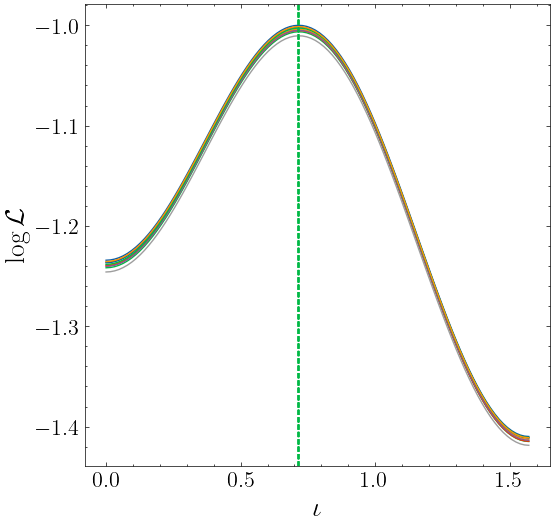

In [54]:
plot_results([yc_1],x,seeds)

## What if we drop the pulsar terms from the synthetic data?

In [55]:
x = np.linspace(0.0,np.pi/2,100)
seeds = np.arange(1237,1247,1)

yc_2 = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_2[j,i] = iterate_over_iota(x[j],measurement_model="earth",use_psr_terms_in_data=False,seed = int(seeds[i]))



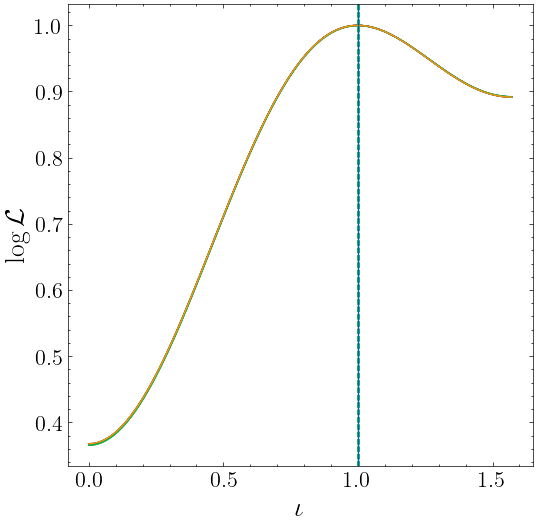

In [58]:
plot_results([yc_2],x,seeds)

##

### Lets now see what the curve is like WITH the pulsar terms

In [59]:
x = np.linspace(0.0,np.pi/2,100)
seeds = np.arange(1237,1247,1)

yc_3 = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_3[j,i] = iterate_over_iota(x[j],measurement_model="pulsar",use_psr_terms_in_data=True,seed = int(seeds[i]))



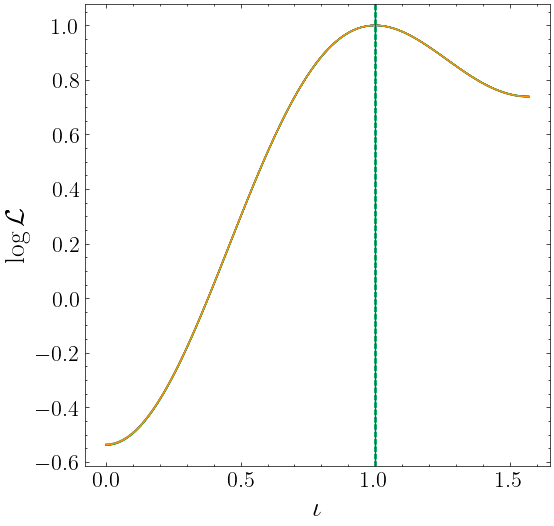

In [60]:
plot_results([yc_3],x,seeds)

## Lets put all these results together

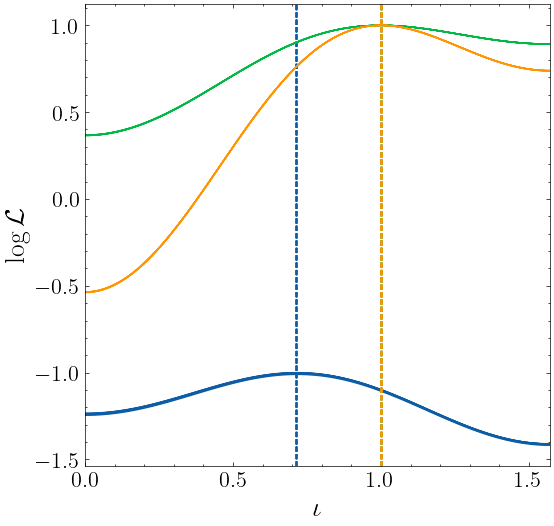

In [82]:
plot_results([yc_1,yc_2,yc_3],x,seeds,savefig='likelihood_iota_new')

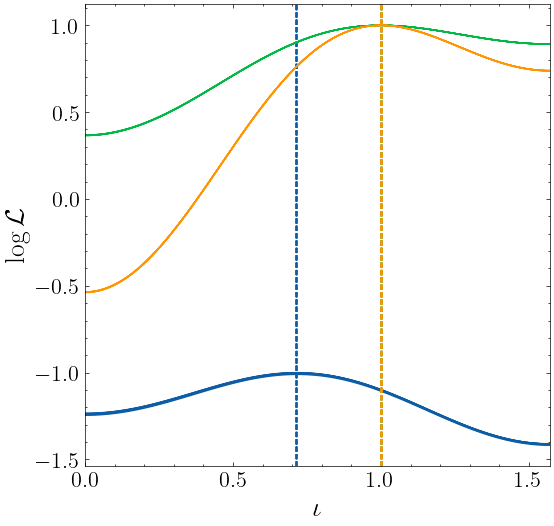

In [78]:
plot_results([yc_1,yc_2,yc_3],x,seeds)

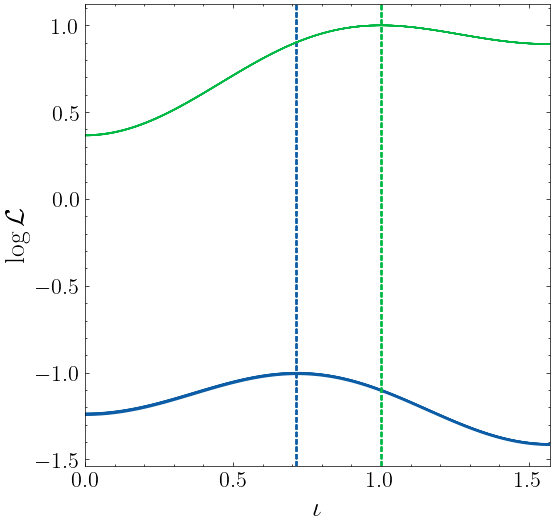

In [83]:
plot_results([yc_1,yc_2],x,seeds,savefig=None)

## APPENDIX

In [ ]:
ax.plot(x,yearth,linestyle = 'solid',c=earth_color)





    idx_psr = np.argmax(ypulsar)
    xc_psr = x[idx_psr]
    ax.axvline(xc_psr,c=psr_color,linestyle='--')


    idx_earth = np.argmax(yearth)
    xc_earth = x[idx_earth]

    #ax.plot([xc_earth,xc_earth],[np.min(yc_earth),np.max(yc_earth)])

    ax.axvline(xc_earth,c=earth_color,linestyle='--')

1237 0.7139983303613167
1238 0.7139983303613167
1239 0.7139983303613167
1240 0.7139983303613167
1241 0.7139983303613167
1242 0.7139983303613167
1243 0.7139983303613167
1244 0.7139983303613167
1245 0.7139983303613167
1246 0.7139983303613167


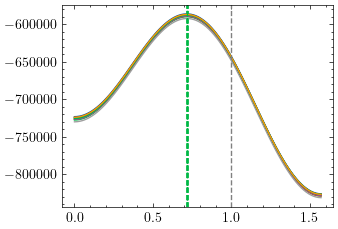

In [41]:


for i in range(len(seeds)):
    y = yc[:,i]
    plt.plot(x,y)
    
    print(seeds[i], xc)


plt.axvline(1.0,c='0.5',linestyle='--')



## New example at a higher resolution and for both Earth and Pulsar solutions 

In [48]:
x = np.linspace(0.0,np.pi/2.0,1000) #100 iotas
seeds = np.arange(1237,1238,1) #1 seeds

In [49]:
yc_pulsar = np.zeros((len(x),len(seeds)))
yc_earth = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_pulsar[j,i] = iterate_over_iota(x[j],measurement_model="pulsar",seed = seeds[i])
        yc_earth[j,i] = iterate_over_iota(x[j],measurement_model="earth",seed = seeds[i])


0


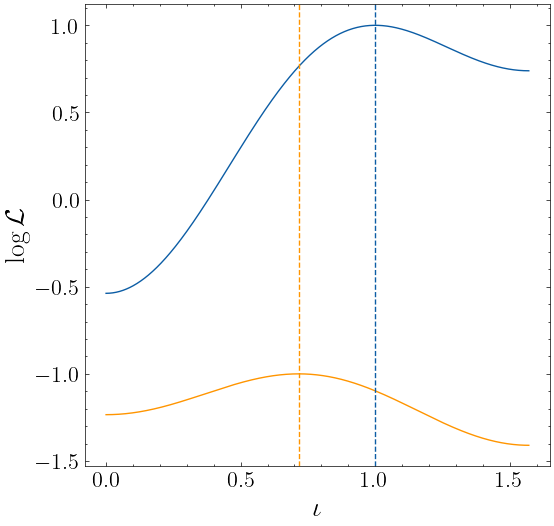

In [57]:



for i in range(len(seeds)):
    print(i)
    ypulsar = yc_pulsar[:,i]
    yearth = yc_earth[:,i]

    #Normalise
    ypulsar = ypulsar / np.abs(np.max(ypulsar))
    yearth = yearth / np.abs(np.max(yearth))
    #yearth = yearth + 2.0 



  



#plt.axvline(1.0,c='C2',linestyle='--')








#ax.yaxis.set_major_locator(plt.MaxNLocator(5))
#plt.setp(ax.get_yticklabels()[0], visible=False)   #no 0th label to prevent overlap  


savefig = 'iota_likelihood_surface'
plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)





## As above, but for multiple noise realisations 

In [12]:
x = np.linspace(0.0,np.pi/2.0,1000) #100 iotas
seeds = np.arange(1237,1247,1) #10 seeds

yc_pulsar = np.zeros((len(x),len(seeds)))
yc_earth = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_pulsar[j,i] = iterate_over_iota(x[j],measurement_model="pulsar",seed = seeds[i])
        yc_earth[j,i] = iterate_over_iota(x[j],measurement_model="earth",seed = seeds[i])

In [33]:
x = np.linspace(0.0,np.pi/2.0,1000) #100 iotas


0
1
2
3
4
5
6
7
8
9


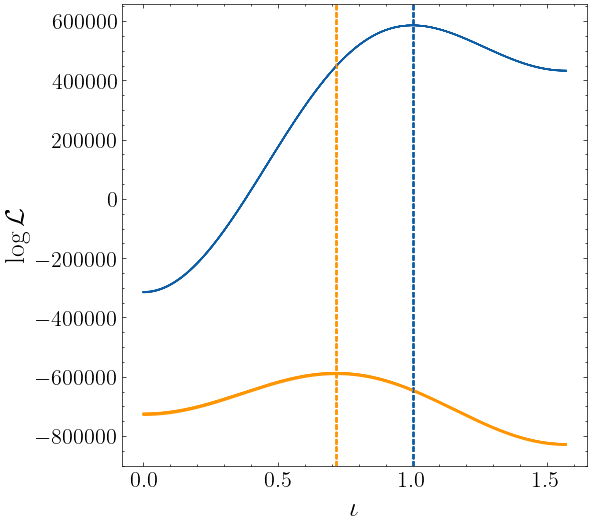

In [35]:


import matplotlib.pyplot as plt 
import scienceplots



plt.style.use('science')
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)


for i in range(len(seeds)):
    print(i)
    ypulsar = yc_pulsar[:,i]
    yearth = yc_earth[:,i]

    #Normalise
    #ypulsar = ypulsar #/ np.abs(np.max(ypulsar))
    yearth = yearth #/ np.abs(np.max(yearth))
    #yearth = yearth + 2.0 



    psr_color = 'C0'
    earth_color = 'C2'
    ax.plot(x,ypulsar,linestyle = 'solid',c=psr_color)
    ax.plot(x,yearth,linestyle = 'solid',c=earth_color)





    idx_psr = np.argmax(ypulsar)
    xc_psr = x[idx_psr]
    ax.axvline(xc_psr,c=psr_color,linestyle='--')


    idx_earth = np.argmax(yearth)
    xc_earth = x[idx_earth]

    #ax.plot([xc_earth,xc_earth],[np.min(yc_earth),np.max(yc_earth)])

    ax.axvline(xc_earth,c=earth_color,linestyle='--')



#plt.axvline(1.0,c='C2',linestyle='--')






fs = 20
ax.set_xlabel(r'$\iota$', fontsize=fs)
ax.set_ylabel(r'$\log \mathcal{L}$', fontsize=fs)

ax.xaxis.set_tick_params(labelsize=fs-4)
ax.yaxis.set_tick_params(labelsize=fs-4)

#ax.yaxis.set_major_locator(plt.MaxNLocator(5))
#plt.setp(ax.get_yticklabels()[0], visible=False)   #no 0th label to prevent overlap  


savefig = 'iota_likelihood_surface_noise'
plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)





In [11]:
yc_earth = np.zeros((len(x),len(seeds)))
for i in range(len(seeds)):
    for j in range(len(x)):
        yc_earth[j,i] = iterate_over_iota(x[j],measurement_model="earth",seed = seeds[i])



1237 0.682265071234147
1238 0.682265071234147
1239 0.682265071234147
1240 0.682265071234147
1241 0.682265071234147
1242 0.682265071234147
1243 0.682265071234147
1244 0.682265071234147
1245 0.682265071234147
1246 0.682265071234147


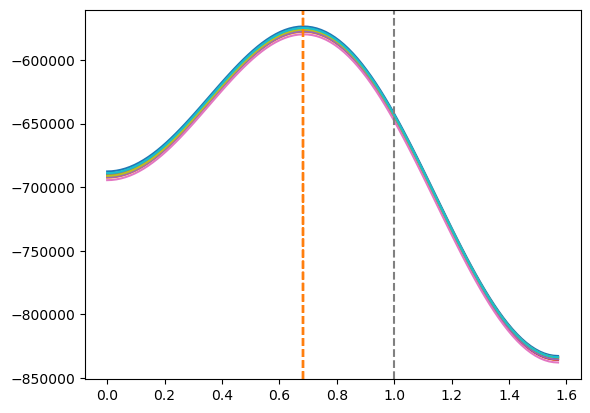

In [12]:
import matplotlib.pyplot as plt 

for i in range(len(seeds)):
    y = yc_earth[:,i]
    plt.plot(x,y)
    idx = np.argmax(y)
    xc = x[idx]
    plt.axvline(xc,c='C1',linestyle='--')
    print(seeds[i], xc)


plt.axvline(1.0,c='0.5',linestyle='--')



1237 1.0313309216330129
1238 1.0313309216330129
1239 1.0313309216330129
1240 1.0313309216330129
1241 1.0313309216330129
1242 1.0313309216330129
1243 1.0313309216330129
1244 1.0313309216330129
1245 1.0313309216330129
1246 1.0313309216330129


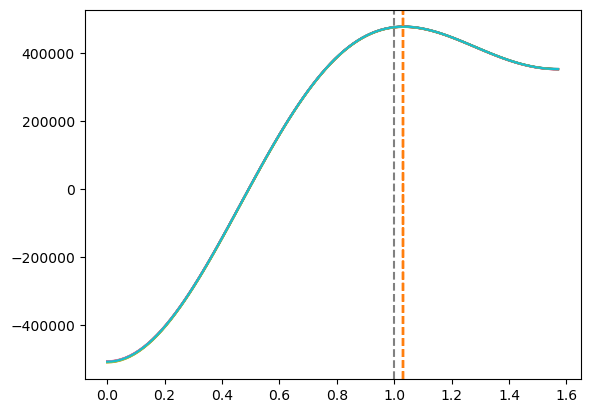

1237 0.7139983303613167
1238 0.7139983303613167
1239 0.7139983303613167
1240 0.7139983303613167
1241 0.7139983303613167
1242 0.7139983303613167
1243 0.7139983303613167
1244 0.7139983303613167
1245 0.7139983303613167
1246 0.7139983303613167


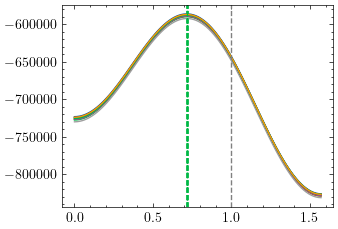

1237 0.7139983303613167
1238 0.7139983303613167
1239 0.7139983303613167
1240 0.7139983303613167
1241 0.7139983303613167
1242 0.7139983303613167
1243 0.7139983303613167
1244 0.7139983303613167
1245 0.7139983303613167
1246 0.7139983303613167


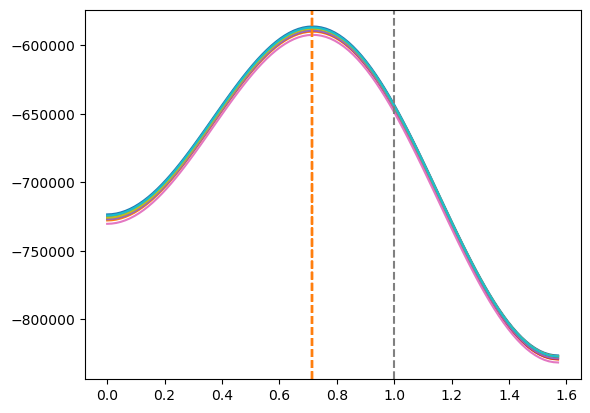

In [23]:
import matplotlib.pyplot as plt 

for i in range(len(seeds)):
    y = yc[:,i]
    plt.plot(x,y)
    idx = np.argmax(y)
    xc = x[idx]
    plt.axvline(xc,c='C1',linestyle='--')
    print(seeds[i], xc)


plt.axvline(1.0,c='0.5',linestyle='--')



## All likelihood curves 

In [22]:
    



def get_likelihood_instance(P,PTA,data,variable,variable_range):

    #Define the model 
    model = LinearModel(P)


    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    #Set the true parameters
    true_parameters = priors_dict(PTA,P)
    
    #Create a copy
    guessed_parameters = true_parameters.copy()

    #Define an output arrau
    likelihoods        =np.zeros_like(variable_range)
    for i,v in enumerate(variable_range):
        guessed_parameters[variable] = v
        model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(guessed_parameters)

        likelihoods[i] = model_likelihood

    return likelihoods

In [130]:

#Setup the synthetic data
seed = 1237
measurement_model = "pulsar"
Npsr = 1 #0
P    = SystemParameters(h=1e-12,σp=None,σm=1e-11,measurement_model=measurement_model,seed=seed,Npsr=Npsr)       #define the system parameters as a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data



selected_parameters = ["omega_gw",
                       "phi0_gw",
                       "psi_gw",
                       "iota_gw",
                       "delta_gw",
                       "alpha_gw",
                        "h"]

nsamples = 1000

parameters_dict = {"omega_gw": np.logspace(-9,-5,nsamples),
                   "phi0_gw": np.linspace(0,np.pi/2,nsamples),
                   "psi_gw": np.linspace(2.0,3.0,nsamples),
                   "iota_gw": np.linspace(0,np.pi/2,nsamples),
                   "delta_gw": np.linspace(0,np.pi/2,nsamples),
                   "alpha_gw": np.linspace(0,np.pi/2,nsamples),
                   "h": np.logspace(-13,-11,nsamples),}

true_parameters = priors_dict(PTA,P)

data_dict = {}
for variable,variable_range in parameters_dict.items():
    print(variable)
    likelihood_values = get_likelihood_instance(P,PTA,data,variable,variable_range)

    data_dict[variable] = likelihood_values



fname = f'likelihood_curves_{measurement_model}_npsr{Npsr}.pkl'

import pickle
# save dictionary to person_data.pkl file
with open(fname, 'wb') as fp:
    pickle.dump(data_dict, fp)
    print('dictionary saved successfully to file:', fname)


INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


omega_gw
phi0_gw
psi_gw
iota_gw
delta_gw
alpha_gw
h
dictionary saved successfully to file: likelihood_curves_pulsar_npsr1.pkl


In [125]:
import numpy as np 
import scienceplots
plt.style.use('science')


def plot_data_dict(xvalues,likelihoods,injection_values):


    h,w = 8,16
    rows = len(likelihoods)
    cols = 1
    fig, axes_object = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))
    fs = 20 #fontsize

    i = 0
    for variable,y in likelihoods.items():

        ax = axes_object[i]
        x = xvalues[variable]

        ax.plot(x,y/1e6)



        idx = np.argmax(y)
        xc = x[idx]
        ax.axvline(xc,c='C3',linestyle='--')

        x_inject = injection_values[variable]
        ax.axvline(x_inject,c='C2',linestyle='--')

        ax.set_xlabel(variable,fontsize=fs)


        if (variable == 'omega_gw') | (variable == 'h'):
            ax.set_xscale('log')


        #ax.set_ylim(np.min(y/1e6),0)






        i += 1
    


    plt.subplots_adjust(hspace=0.5,wspace=0.5)

    


def plot_single_data_dict(xvalues,likelihoods,injection_values,variable,xlabel_string,savefig):


    h,w = 8,8
    rows = 1
    cols = 1
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(h,w))
    fs = 20 #fontsize

    i = 0
    

    #ax = axes_object
    x = xvalues[variable]
    y = likelihoods[variable]

    ax.plot(x,y/1e6)



    idx = np.argmax(y)
    xc = x[idx]
    ax.axvline(xc,c='C3',linestyle='--')

    x_inject = injection_values[variable]
    ax.axvline(x_inject,c='C2',linestyle='--')

    ax.set_xlabel(variable,fontsize=fs)

    print(xlabel_string, x_inject,xc)


    if (variable == 'omega_gw') | (variable == 'h'):
        ax.set_xscale('log')




    ax.set_xlabel(xlabel_string, fontsize=fs)
    ax.set_ylabel(r'$\log \mathcal{L}$', fontsize=fs)
    ax.xaxis.set_tick_params(labelsize=fs-4)
    ax.yaxis.set_tick_params(labelsize=fs-4)
        
    
    plt.savefig(f"../data/images/{savefig}.png", bbox_inches="tight",dpi=300)

    plt.show()
    #ax.set_ylim(np.min(y/1e6),0)

    








$\Omega$ 5e-07 4.951020159556351e-07


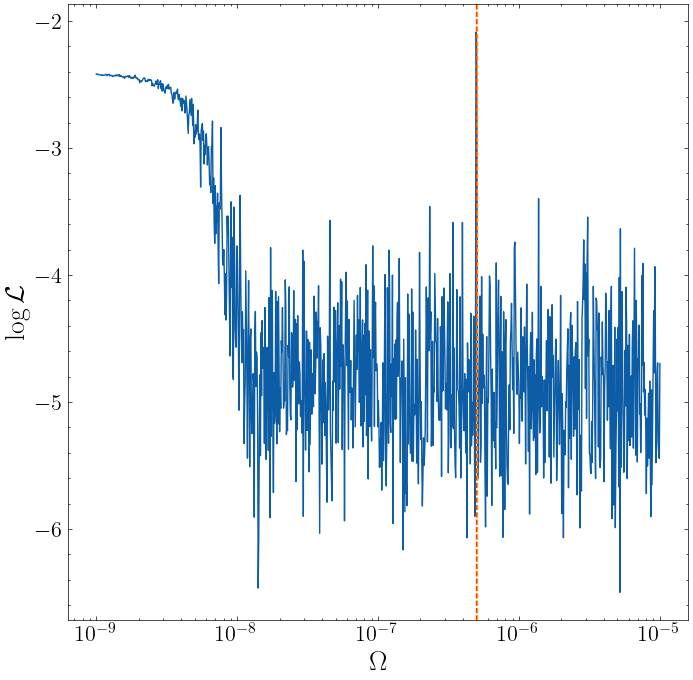

$\Phi_0$ 0.2 0.19969082432727914


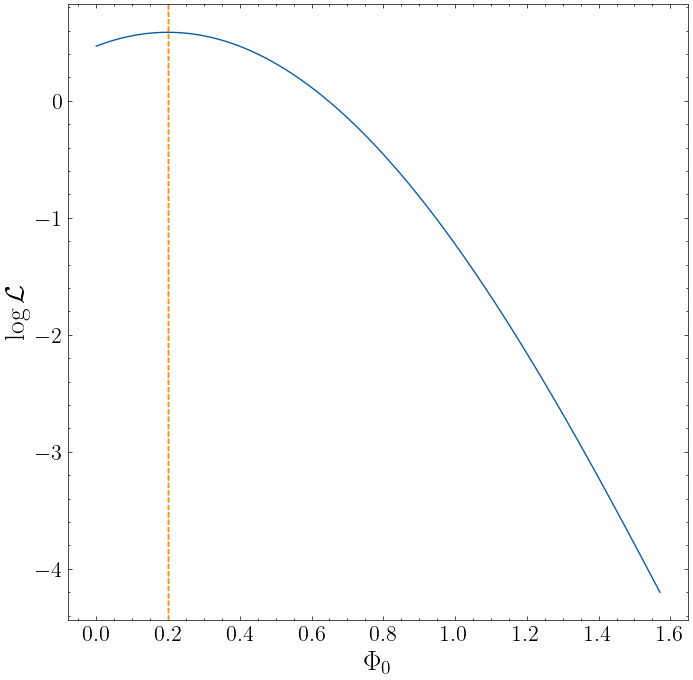

$\psi$ 2.5 2.5005005005005003


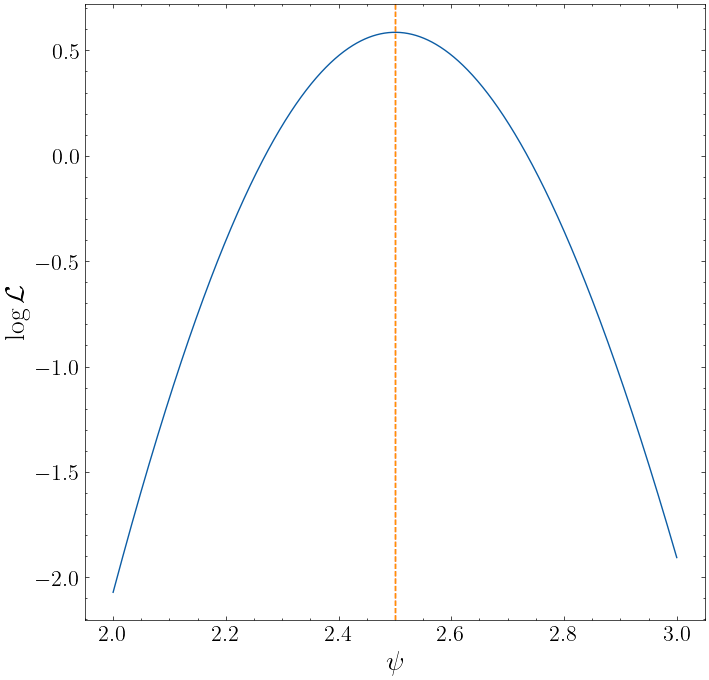

$\iota$ 1.0 1.000026490331886


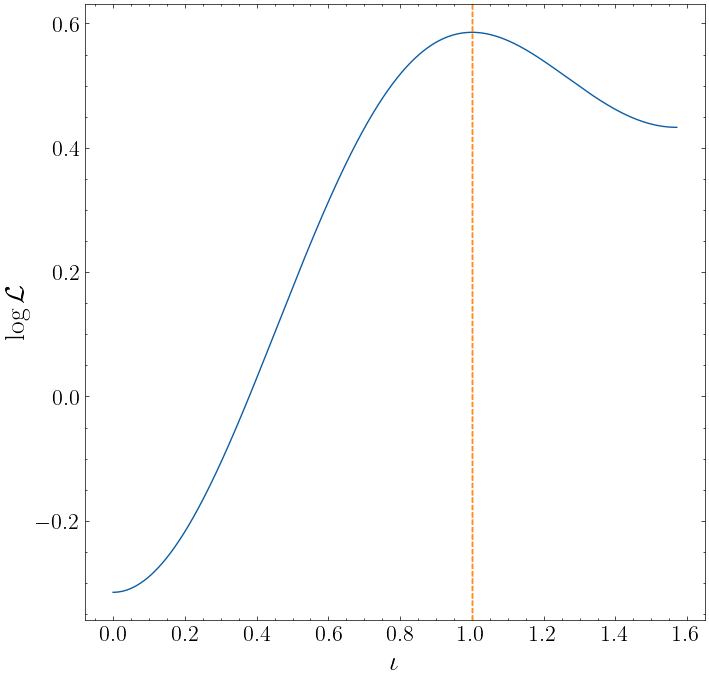

$\delta$ 1.0 1.0361909703281649


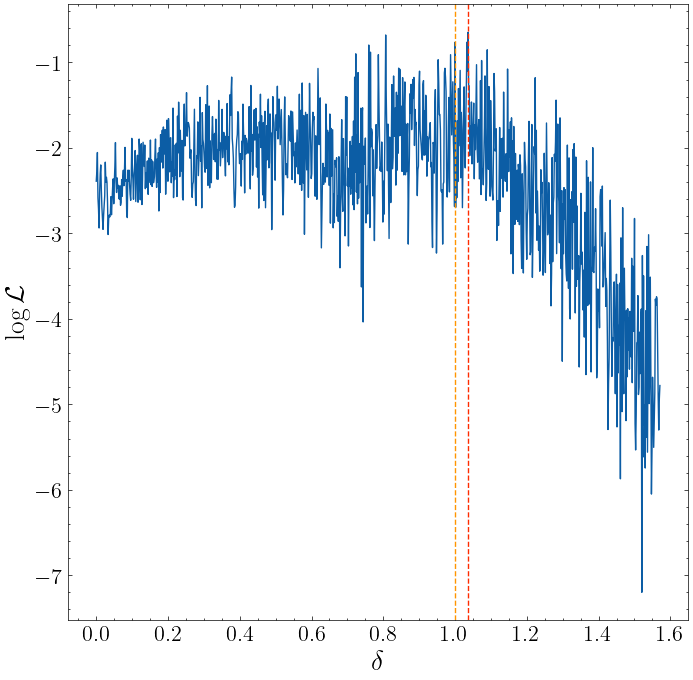

$\alpha$ 1.0 0.8632304138242224


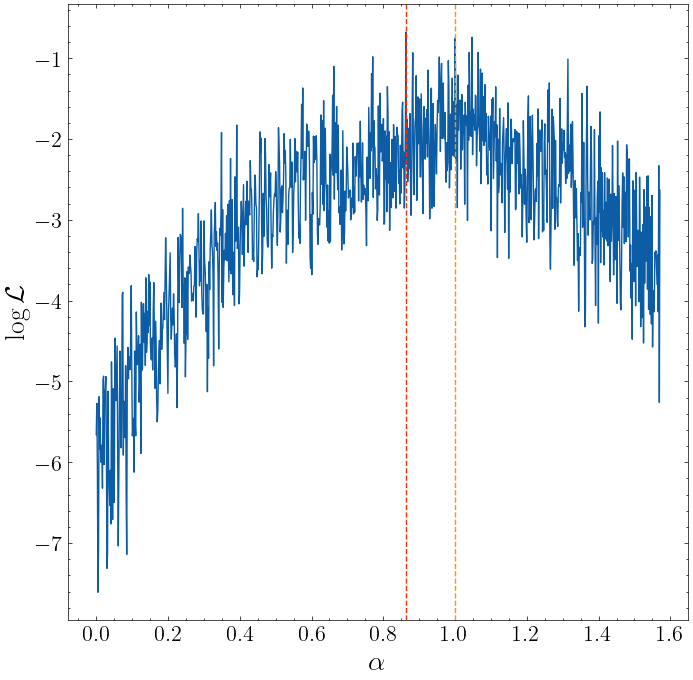

h 1e-12 9.976977642363212e-13


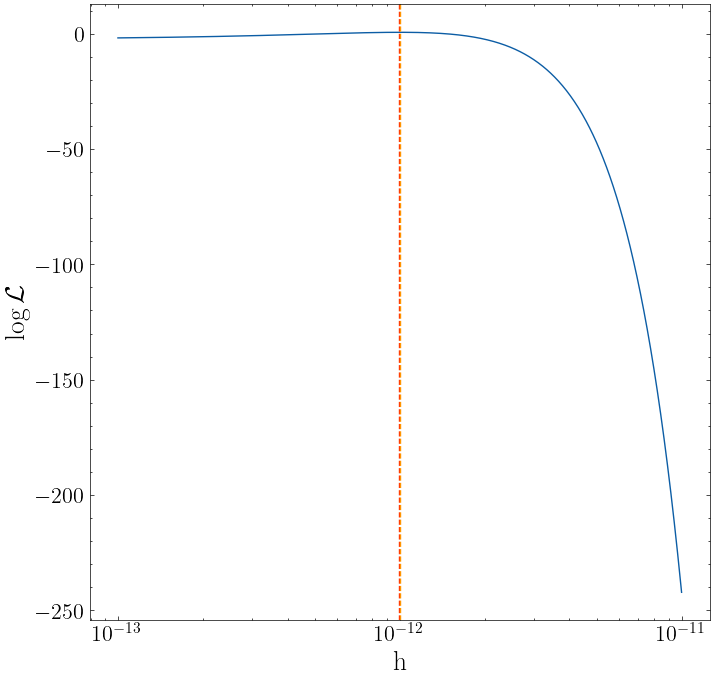

In [128]:

fname = 'likelihood_curves_pulsar.pkl'
with open(fname, 'rb') as fp:
    loaded_data = pickle.load(fp)

savefig = ['likelihood_omega_psr','likelihood_phi0_psr','likelihood_psi_psr','likelihood_iota_psr','likelihood_delta_psr','likelihood_alpha_psr','likelihood_h_psr']

labels = [r'$\Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
i = 0
for variable in loaded_data.keys():
    plot_single_data_dict(parameters_dict,loaded_data,true_parameters,variable,labels[i],savefig[i])
    i += 1

$\Omega$ 5e-07 4.996877453854889e-07


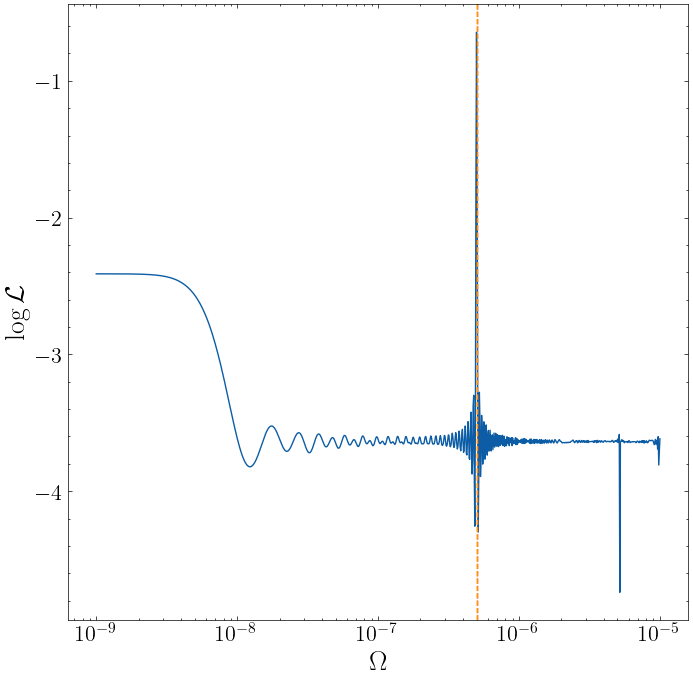

$\Phi_0$ 0.2 0.21698687997767338


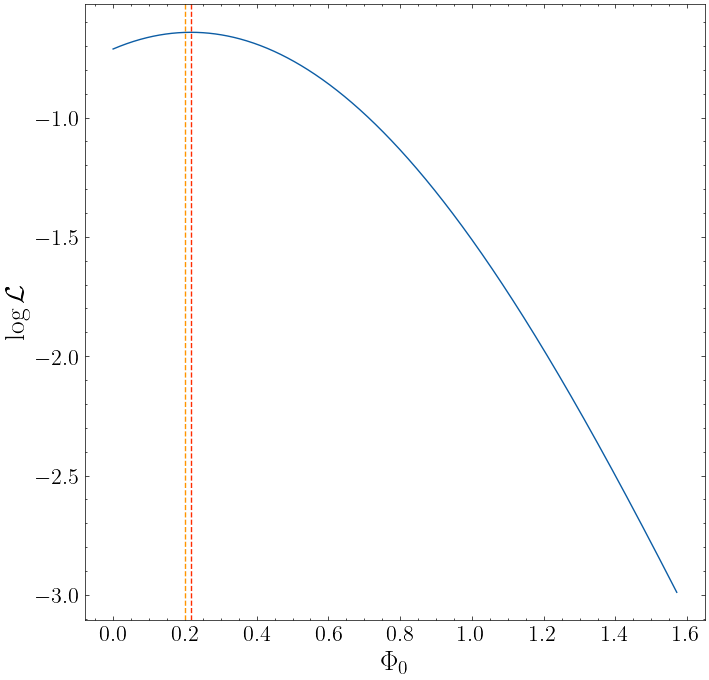

$\psi$ 2.5 2.5505505505505504


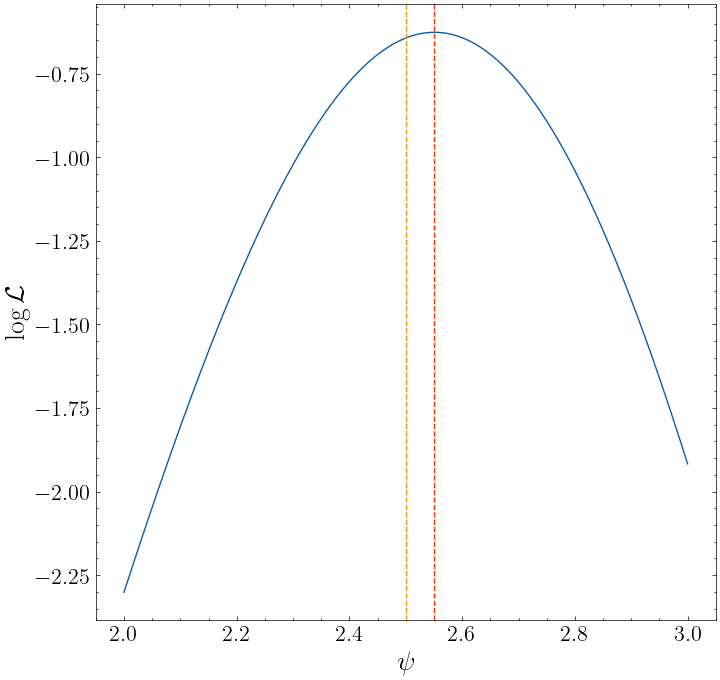

$\iota$ 1.0 0.7154277564481261


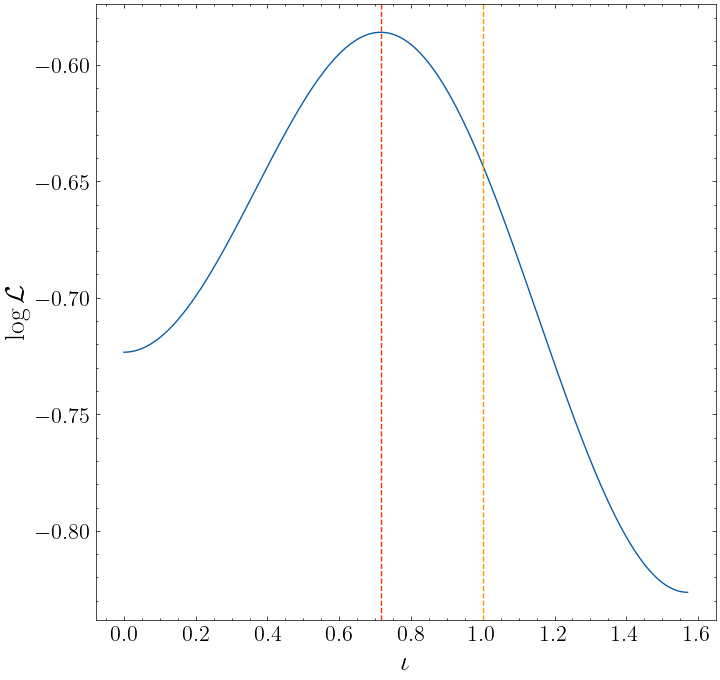

$\delta$ 1.0 0.9748685912040398


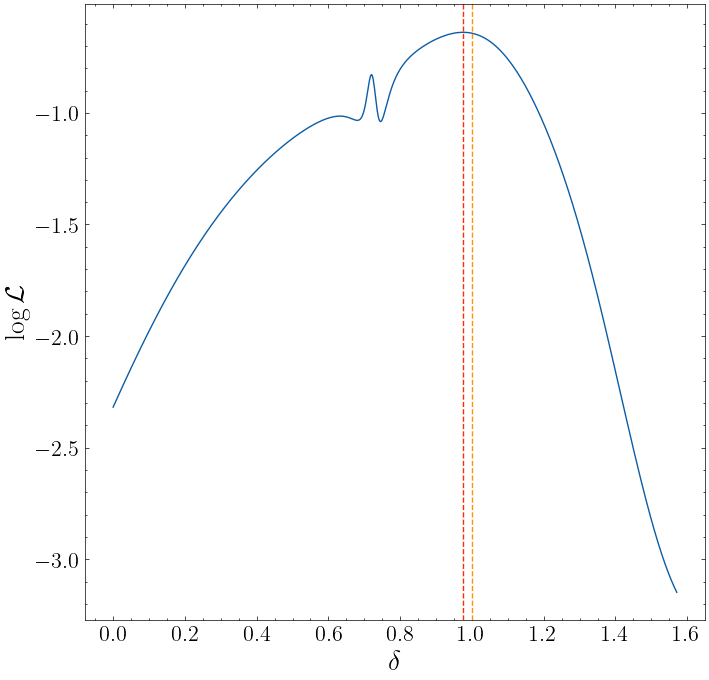

$\alpha$ 1.0 0.9701514851175687


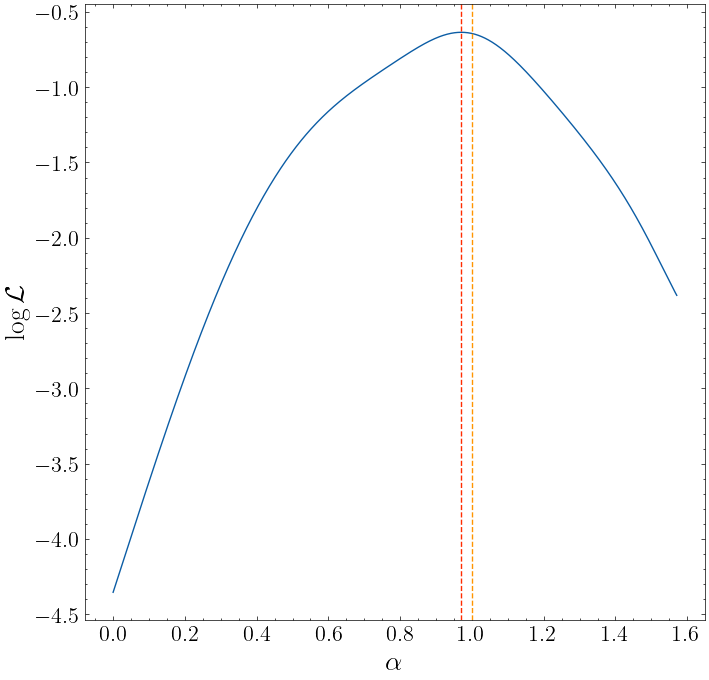

h 1e-12 1.216424293857368e-12


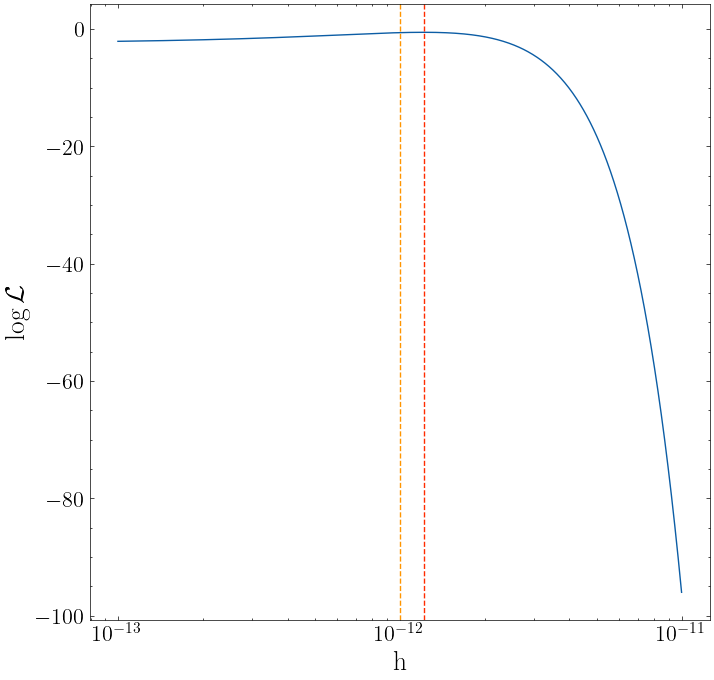

In [129]:

fname = 'likelihood_curves_earth.pkl'
with open(fname, 'rb') as fp:
    loaded_data = pickle.load(fp)


labels = [r'$\Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
savefig = ['likelihood_omega_earth','likelihood_phi0_earth','likelihood_psi_earth','likelihood_iota_earth','likelihood_delta_earth','likelihood_alpha_earth','likelihood_h_earth']
i = 0
for variable in loaded_data.keys():
    plot_single_data_dict(parameters_dict,loaded_data,true_parameters,variable,labels[i],savefig[i])
    i += 1

$\Omega$ 5e-07 4.996877453854889e-07


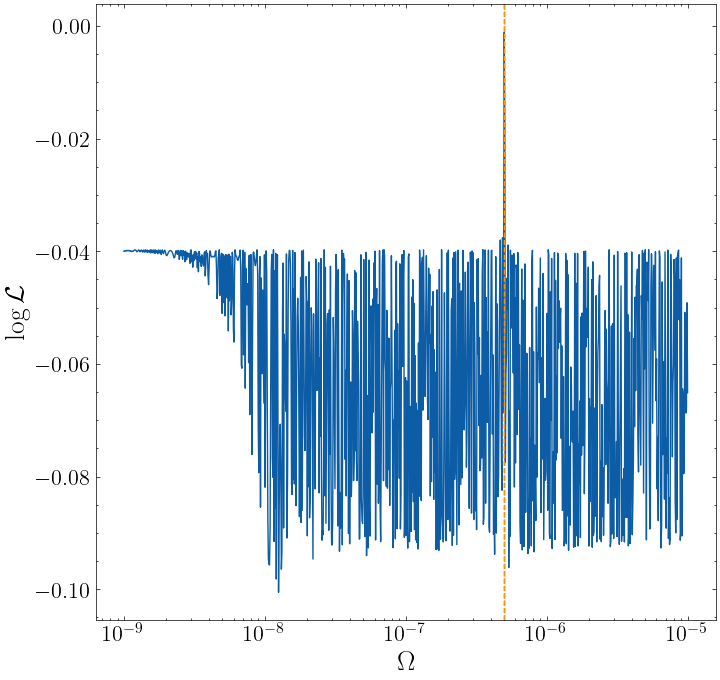

$\Phi_0$ 0.2 0.2028355617182599


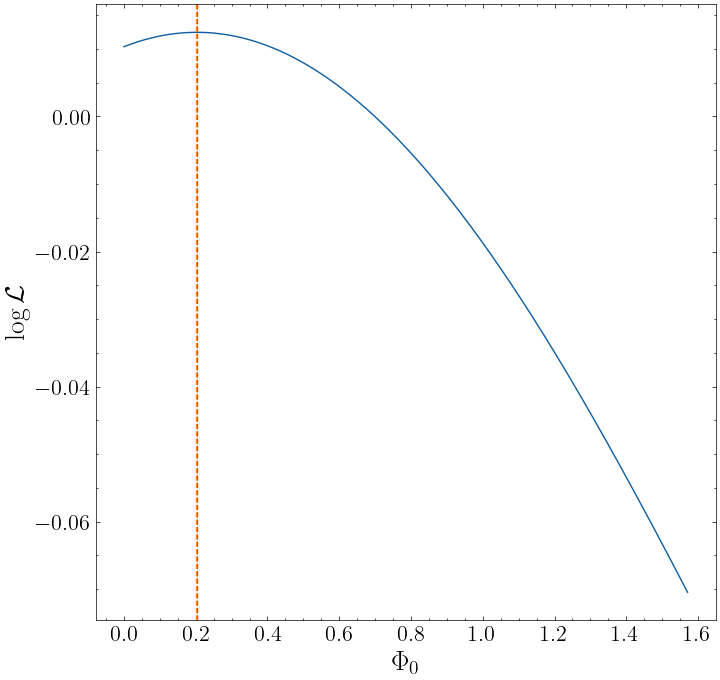

$\psi$ 2.5 2.4994994994994997


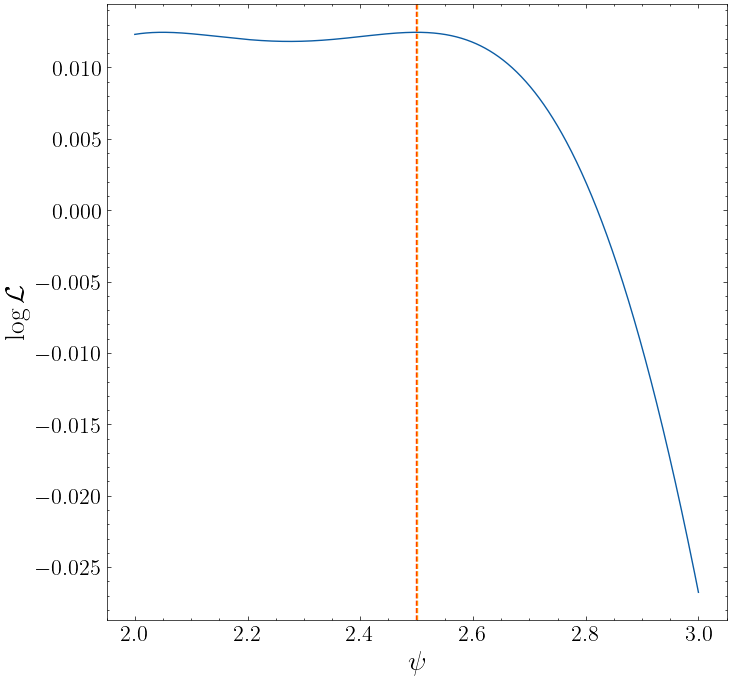

$\iota$ 1.0 1.000026490331886


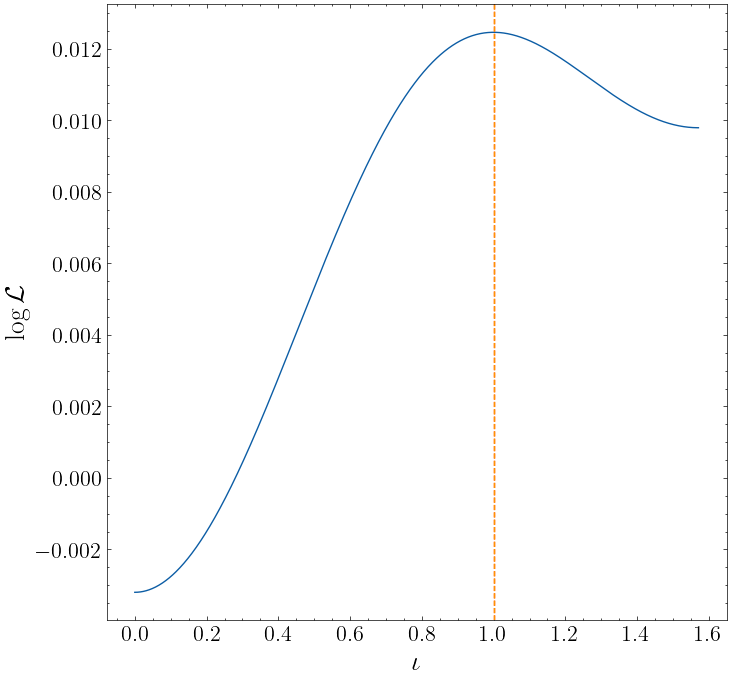

$\delta$ 1.0 0.9921646468544341


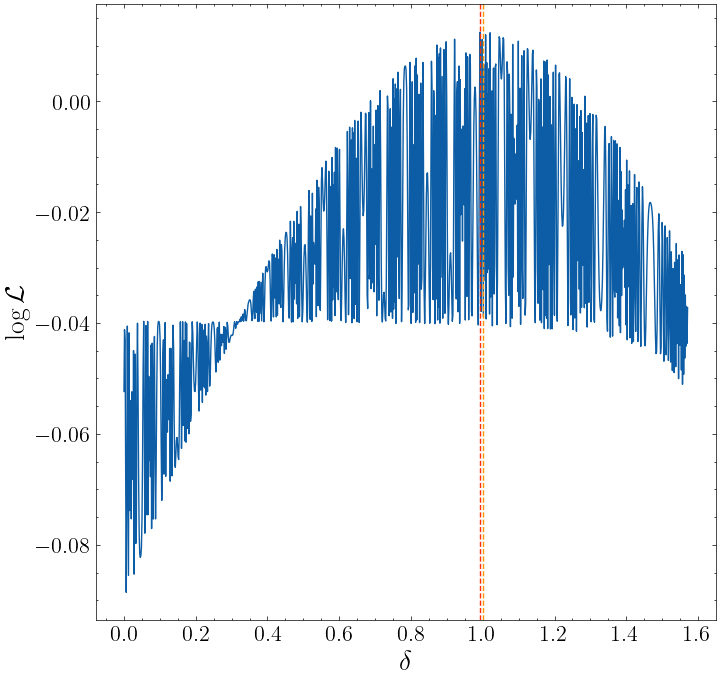

$\alpha$ 1.0 1.1824212590087708


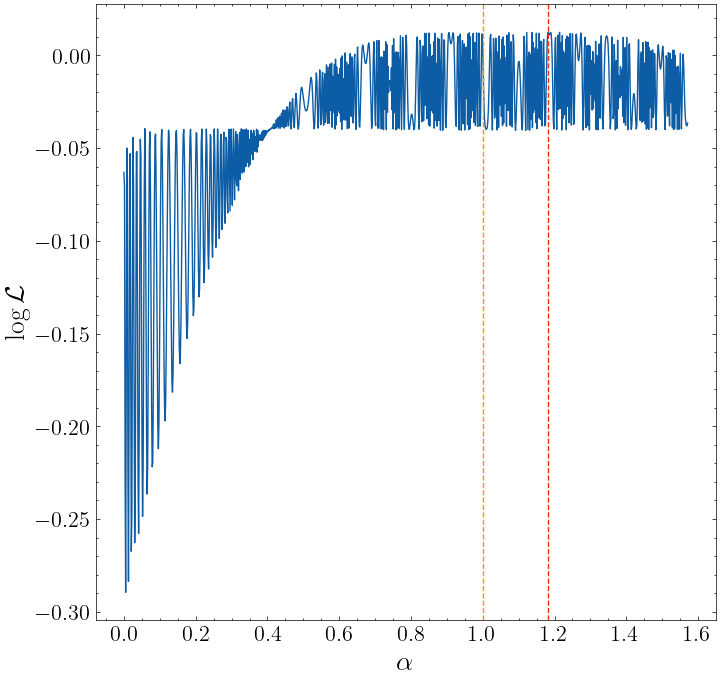

h 1e-12 1.0023075482838644e-12


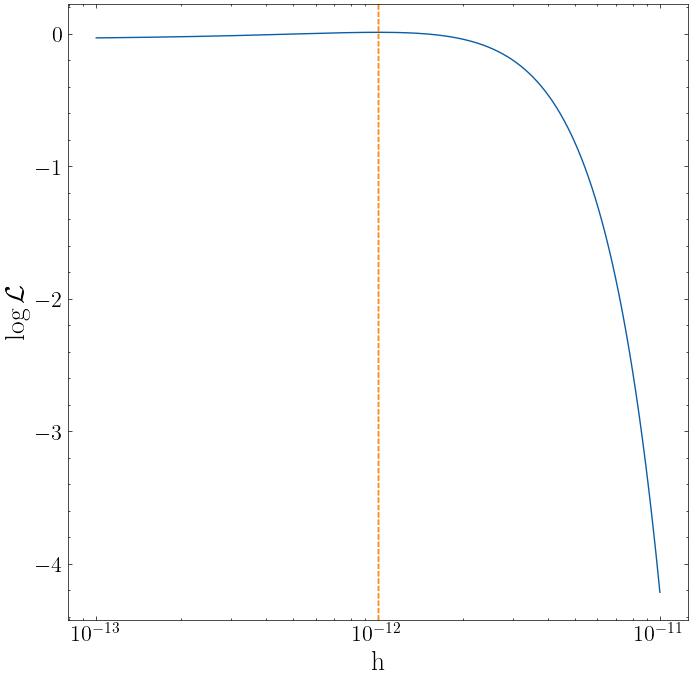

In [132]:

fname = 'likelihood_curves_pulsar_npsr1.pkl'
with open(fname, 'rb') as fp:
    loaded_data = pickle.load(fp)

labels = [r'$\Omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
i = 0
for variable in loaded_data.keys():
    plot_single_data_dict(parameters_dict,loaded_data,true_parameters,variable,labels[i],None)
    i += 1

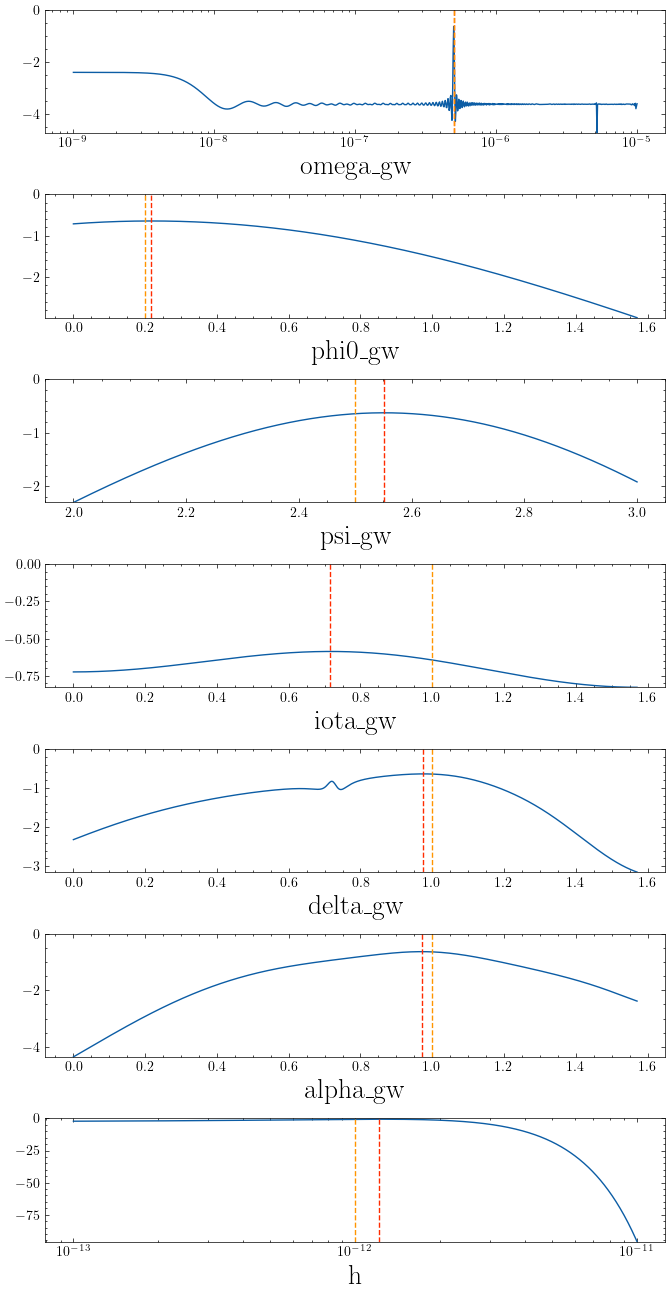

In [ ]:
plot_data_dict(parameters_dict,loaded_data,true_parameters)

In [30]:
variable = 'iota_gw'
variable_range = np.arange(0,np.pi/2.0,0.1)
iota_likelihoods = get_likelihood_instance(P,PTA,data,variable,variable_range)

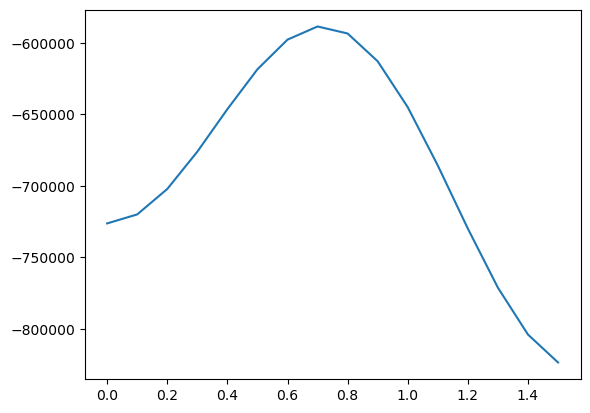

In [31]:
plt.plot(variable_range,iota_likelihoods)

0 omega_gw 5e-07
1 psi_gw 2.5
2 phi0_gw 0.2
3 iota_gw 1.0
4 delta_gw 1.0
5 alpha_gw 1.0
6 h 1e-08


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


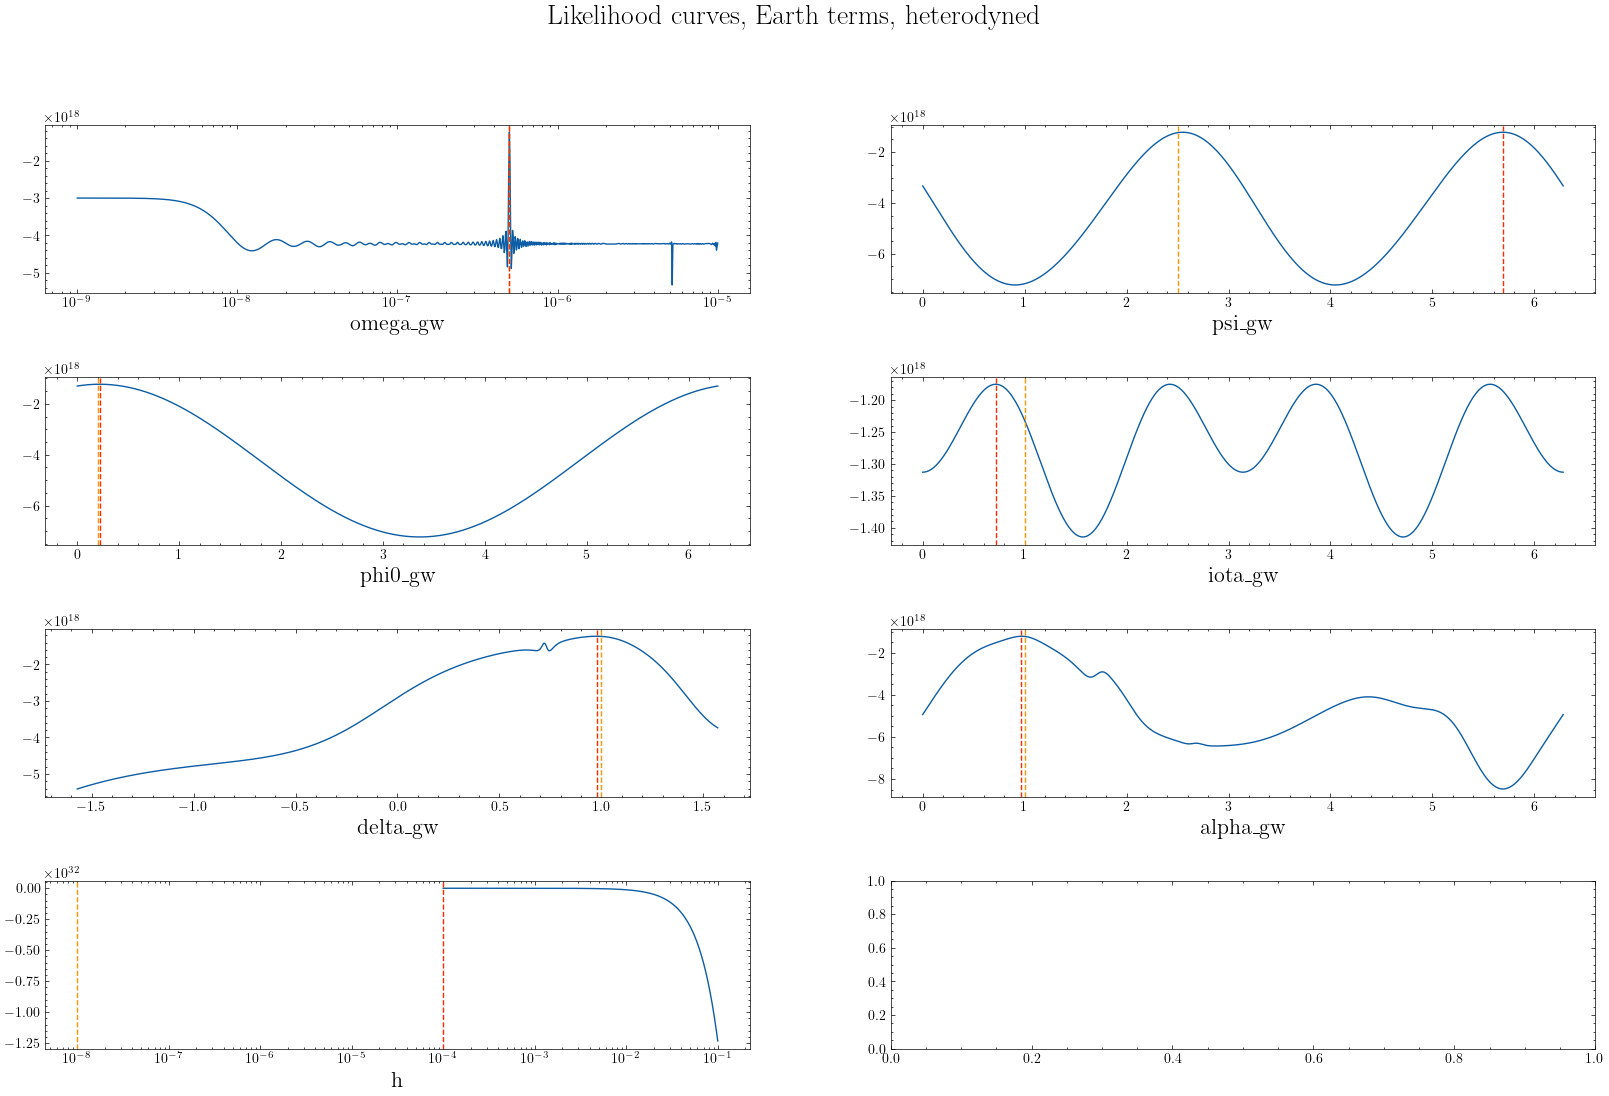

In [13]:
selected_parameters = ["omega_gw",
                    "phi0_gw",
                       "psi_gw",
                        "iota_gw",
                        "delta_gw",
                        "alpha_gw",
                        "h"]
parameters_dict = {k: guessed_parameters[k] for k in selected_parameters}


nsamples = int(1e3)

priors = [np.logspace(-9,-5,nsamples),                   # omega
          np.linspace(0,2*np.pi,nsamples),               # psi
          np.linspace(0,2*np.pi,nsamples),               # phi0
          np.linspace(0,2*np.pi,nsamples),               # iota
          np.linspace(-np.pi/2.0,np.pi/2.0,nsamples),    # delta
          np.linspace(0,2*np.pi,nsamples),               # alpha
          np.logspace(-4,-1,nsamples),                   # h
]

from plotting import likelihoods_over_priors
#likelihoods_over_priors(parameters_dict,priors,PTA,P,KF)
likelihoods_over_priors(parameters_dict,priors,PTA,P,KF,"Likelihood curves, Earth terms, heterodyned", savefig=None)
